#  Linear regression

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss

In [1]:
from google.colab import files
uploaded = files.upload()
!ls

Saving ex1data1.txt to ex1data1.txt
ex1data1.txt  sample_data


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('ex1data1.txt', delimiter=',')  # Load the text file with a comma as a delimiter
print(data[0:5,:])
#load the data a create a np vectors X and y
X = data[:, 0]  # Todas las filas, primera columna (población)
y = data[:, 1]  # Todas las filas, segunda columna (ganancia)

# Verificación
print("\nPrimeros 5 valores de X (Población):", X[:5])
print("Primeros 5 valores de y (Ganancia):", y[:5])



[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]

Primeros 5 valores de X (Población): [6.1101 5.5277 8.5186 7.0032 5.8598]
Primeros 5 valores de y (Ganancia): [17.592   9.1302 13.662  11.854   6.8233]


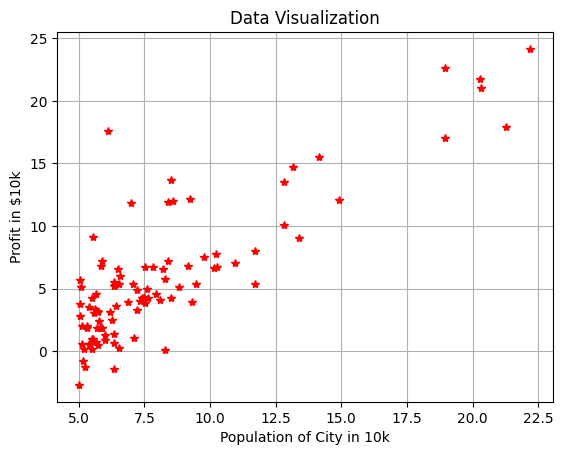

In [5]:
# ==================== Part 1: Plotting ====================


# Plot data
plt.plot(X, y, '*r', label='Profit')  # Red stars for positive examples
plt.grid(True)  # Turn on the grid
#plt.legend()    # Add legend
plt.xlabel('Population of City in 10k')  # Label for x-axis
plt.ylabel('Profit in $10k')  # Label for y-axis
plt.title('Data Visualization')  # Add a title
plt.show()

# Cost Function

The objective of linear regression is to minimize the cost function:
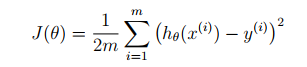

where the hypothesis h is given by

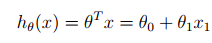

**Create a matrix by adding a column of ones to the vecto X**

You should expect to see a cost of approximately 32.07


In [7]:
from scipy.optimize import minimize

# Función de costo para regresión lineal
def cost_function(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)  # h_θ(x) = X * θ
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)  # Error cuadrático medio
    return J

m = data.shape[0]  # Número de ejemplos

# Preparar X e y
X = data[:, 0]  # Población (vector 1D)
y = data[:, 1]  # Ganancia (vector 1D)

# Añadir columna de unos a X para el término de bias (θ₀)
X = np.column_stack((np.ones(m), X))  # X ahora es una matriz (m, 2)

# Inicializar theta como vector 2x1 (para θ₀ y θ₁)
theta = np.zeros(2)  # Forma (2,), no (2, 1)


print("Dimensiones correctas:")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("theta shape:", theta.shape)

# Calcular costo inicial (debe ser ~32.07)
initial_cost = cost_function(theta, X, y)
print(f"Costo inicial: {initial_cost:.2f}")

Dimensiones correctas:
X shape: (97, 2)
y shape: (97,)
theta shape: (2,)
Costo inicial: 32.07


# Gradient descent

Next, you will implement gradient descent in the file gradientDescent.m.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

Using the following values:
iterations = 3
theta = np.zeros((2, 1))
alpha = 0.01

The first three iteration:

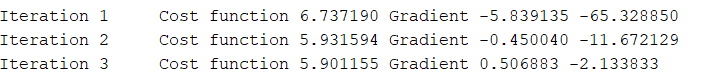



Ejecutando descenso de gradiente con 3 iteraciones...

Progreso del descenso de gradiente:
Iteración | Costo      | Gradiente (θ₀) | Gradiente (θ₁)
---------|------------|----------------|----------------
       1 | 6.737190 | -5.839135      | -65.328850
       2 | 5.931594 | -0.450040      | -11.672129
       3 | 5.901155 | 0.506883      | -2.133833

Theta óptimo encontrado: [0.05782293 0.79134812]

Predicciones:
- Para 35,000 habitantes: $28275.41
- Para 70,000 habitantes: $55972.60


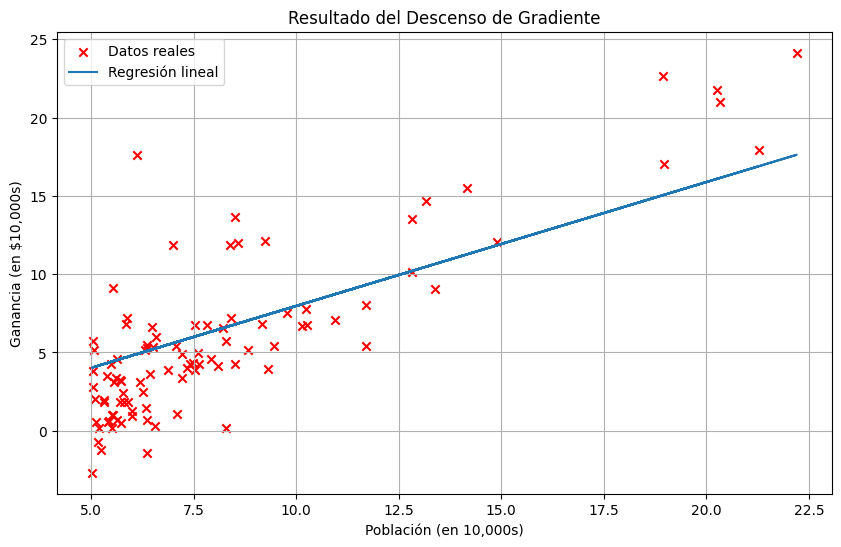

In [9]:
m = data.shape[0]
y = data[:, [1]]  # Ganancia (target)
X = data[:, [0]]  # Población (feature)
X = np.hstack([np.ones((m, 1)), X])  # Añadir columna de unos para theta_0

# --- Parámetros iniciales ---
theta = np.zeros((2, 1))  # Inicializar theta como [[0], [0]]
alpha = 0.01  # Tasa de aprendizaje
iterations = 3  # Número de iteraciones

# --- Función de costo ---
def cost_function(theta, X, y):
    m = len(y)
    predictions = X @ theta  # h_θ(x) = X * theta
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)  # Error cuadrático medio
    return J

# --- Descenso de gradiente  ---
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)

    print("\nProgreso del descenso de gradiente:")
    print("Iteración | Costo      | Gradiente (θ₀) | Gradiente (θ₁)")
    print("---------|------------|----------------|----------------")

    for iter in range(iterations):
        # Calcular predicciones, errores y gradiente
        predictions = X @ theta
        errors = predictions - y
        gradient = (X.T @ errors) / m
        theta = theta - alpha * gradient  # Actualizar theta

        # Guardar costo
        J_history[iter] = cost_function(theta, X, y)

        # Mostrar información
        print(f"{iter + 1:8} | {J_history[iter]:.6f} | {gradient[0,0]:.6f}      | {gradient[1,0]:.6f}")

    return theta

# ---  Ejecutar descenso de gradiente ---
print("Ejecutando descenso de gradiente con 3 iteraciones...")
theta = gradientDescent(X, y, theta, alpha, iterations)

# ---  Resultados finales ---
print("\nTheta óptimo encontrado:", theta.ravel())

# Predicciones
predict1 = np.array([1, 3.5]) @ theta  # Población = 35,000
predict2 = np.array([1, 7.0]) @ theta  # Población = 70,000
print(f"\nPredicciones:")
print(f"- Para 35,000 habitantes: ${predict1.item() * 10000:.2f}")
print(f"- Para 70,000 habitantes: ${predict2.item() * 10000:.2f}")

# ---  Graficar resultados ---
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='red', marker='x', label='Datos reales')
plt.plot(X[:, 1], X @ theta, label='Regresión lineal')
plt.xlabel('Población (en 10,000s)')
plt.ylabel('Ganancia (en $10,000s)')
plt.title('Resultado del Descenso de Gradiente')
plt.legend()
plt.grid(True)
plt.show()

# Visualization

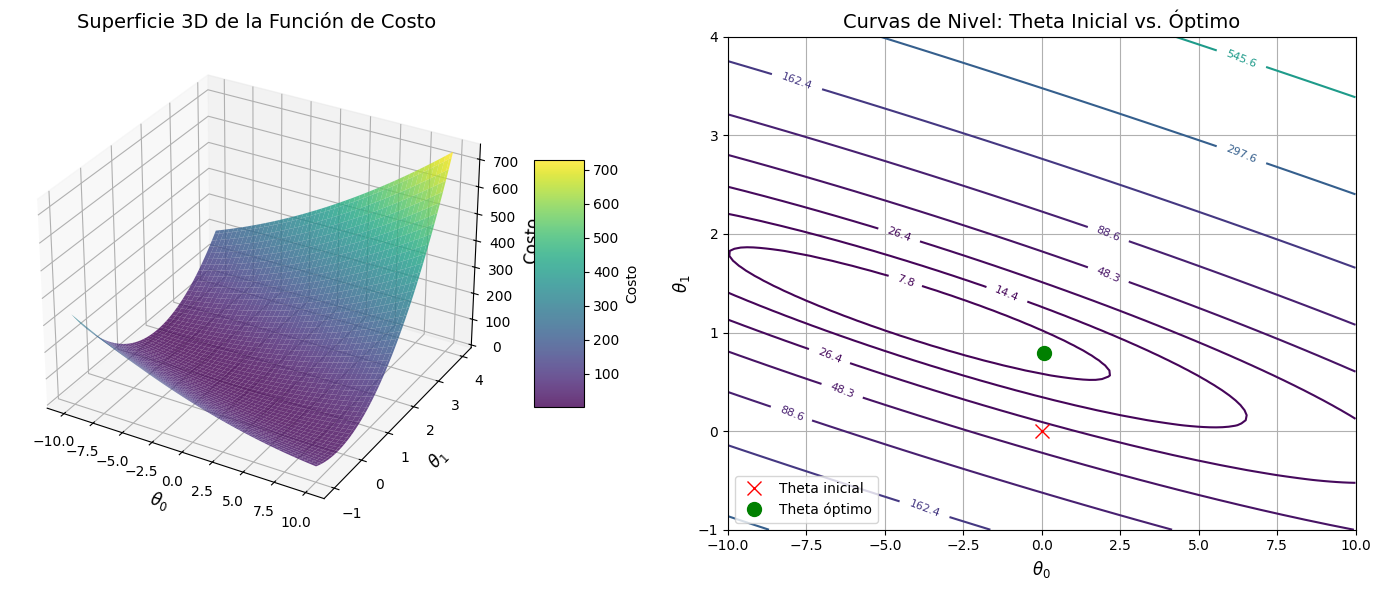

In [10]:
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots

# --- Definir rangos de theta  ---
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# --- Calcular J(theta) para cada combinación ---
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])  # Formato (2, 1)
        J_vals[i, j] = cost_function(t, X, y)
J_vals = J_vals.T

# --- Crear figura unificada (3D + Contorno) ---
fig = plt.figure(figsize=(14, 6))

# Subplot 1: Superficie 3D
ax1 = fig.add_subplot(121, projection='3d')
theta0_mesh, theta1_mesh = np.meshgrid(theta0_vals, theta1_vals)
surf = ax1.plot_surface(theta0_mesh, theta1_mesh, J_vals, cmap='viridis', alpha=0.8)
ax1.set_xlabel(r'$\theta_0$', fontsize=12)
ax1.set_ylabel(r'$\theta_1$', fontsize=12)
ax1.set_zlabel('Costo', fontsize=12)
ax1.set_title('Superficie 3D de la Función de Costo', fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5, label='Costo')

# Subplot 2: Curvas de nivel
ax2 = fig.add_subplot(122)
levels = np.logspace(-2, 3, 20)
cp = ax2.contour(theta0_vals, theta1_vals, J_vals, levels=levels)
ax2.clabel(cp, inline=True, fontsize=8)
ax2.set_xlabel(r'$\theta_0$', fontsize=12)
ax2.set_ylabel(r'$\theta_1$', fontsize=12)
ax2.set_title('Curvas de Nivel: Theta Inicial vs. Óptimo', fontsize=14)

# Puntos clave (theta inicial vs. óptimo)
theta_init = np.zeros((2, 1))  # Theta inicial [0, 0]
theta_opt = theta.reshape(2, 1)  # Asegurar formato (2, 1) usando theta óptimo
ax2.plot(theta_init[0, 0], theta_init[1, 0], 'rx', markersize=10, label='Theta inicial')
ax2.plot(theta_opt[0, 0], theta_opt[1, 0], 'go', markersize=10, label='Theta óptimo')
ax2.legend(fontsize=10)
ax2.grid(True)

plt.tight_layout()
plt.show()
